In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
lyrics_folder = "../data/lyrics"


In [3]:
# Read all lyrics files into a DataFrame
lyrics_data = []
for file_name in os.listdir(lyrics_folder):
    file_path = os.path.join(lyrics_folder, file_name)
    with open(file_path, "r", encoding="utf-8") as file:
        lyrics = file.read()
    song_title = file_name.replace(".txt", "").strip()
    lyrics_data.append({"song_title": song_title, "lyrics": lyrics})
# Create DataFrame
df = pd.DataFrame(lyrics_data)
# Preview first 5 rows
df.head()


,song_title,lyrics
0,Zayn Back To Life,"[Intro]\nOh, oh\nOh, oh\n[Verse 1]\nWhat if I ..."
1,Zayn Befour,[Intro]\nI've done this before\nNot like this\...
2,Zayn Better,[Verse 1]\nHope I only leave good vibes on you...
3,Zayn Blue,"[Verse 1]\nIn the clouds, where the angels sin..."
4,Zayn Borderz,"[Intro]\nBorder\nBorder\nBorder\nBorder, ayy\n..."


In [4]:
import re

def clean_lyrics(text):
    # Remove extra spaces, newlines, and unwanted symbols
    text = text.replace("\n", " ")          # Convert newlines to spaces
    text = re.sub(r"\[.*?\]", "", text)      # Remove anything inside square brackets (like [Chorus])
    text = re.sub(r"[^a-zA-Z0-9.,!? ]", "", text)  # Remove anything that isn't a letter, number, space, or punctuation
    text = re.sub(r"\s+", " ", text)         # Replace multiple spaces with a single space
    return text.strip()

df['clean_lyrics'] = df['lyrics'].apply(clean_lyrics)

# Preview to check cleaning
df[['song_title', 'clean_lyrics']].head()


,song_title,clean_lyrics
0,Zayn Back To Life,"Oh, oh Oh, oh What if I changed my mind? What ..."
1,Zayn Befour,Ive done this before Not like this I dont drin...
2,Zayn Better,Hope I only leave good vibes on your living ro...
3,Zayn Blue,"In the clouds, where the angels sing In her ey..."
4,Zayn Borderz,"Border Border Border Border, ayy She is the li..."


In [5]:
df['word_count'] = df['clean_lyrics'].apply(lambda x: len(x.split()))
df[['song_title', 'word_count']].head()


,song_title,word_count
0,Zayn Back To Life,277
1,Zayn Befour,391
2,Zayn Better,279
3,Zayn Blue,176
4,Zayn Borderz,408


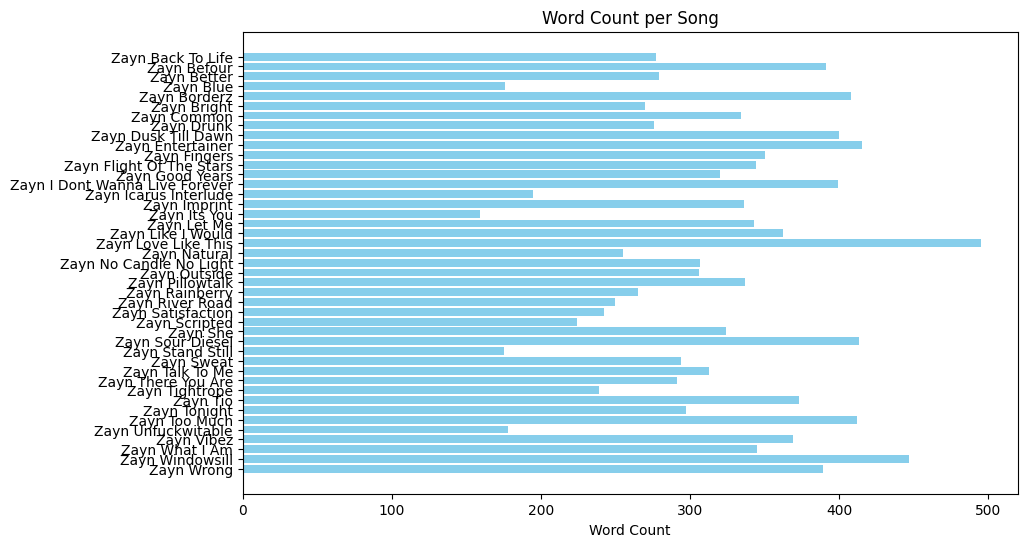

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(df['song_title'], df['word_count'], color='skyblue')
plt.xlabel('Word Count')
plt.title('Word Count per Song')
plt.gca().invert_yaxis()  # So longest songs appear at the top
plt.show()


In [7]:
from collections import Counter
import string

# Optional: Basic stopword list (you can customize later)
stopwords = set([
    "the", "and", "i", "you", "to", "a", "me", "it", "in", "on", "my", 
    "your", "with", "that", "for", "is", "of", "this", "at", "we", "be", 
    "but", "so", "oh", "yeah", "all", "just", "like", "if", "are", "can", "do", "when"
])

# Combine all cleaned lyrics into one big string
all_lyrics = " ".join(df['clean_lyrics'])

# Remove punctuation and split into words
all_words = all_lyrics.translate(str.maketrans("", "", string.punctuation)).lower().split()

# Filter out stopwords
filtered_words = [word for word in all_words if word not in stopwords]

# Count word frequency
word_freq = Counter(filtered_words)

# Top 20 words
top_words = word_freq.most_common(20)

# Display
top_words_df = pd.DataFrame(top_words, columns=["word", "count"])
print(top_words_df)


     word  count
0    love    179
1     she    148
2    dont    136
3      im    126
4   wanna    122
5      no    118
6     its    109
7    know    107
8   right     98
9    take     94
10   what     89
11   need     82
12   cant     77
13    say     77
14   burn     77
15   back     76
16    off     68
17    see     67
18   come     67
19     up     66


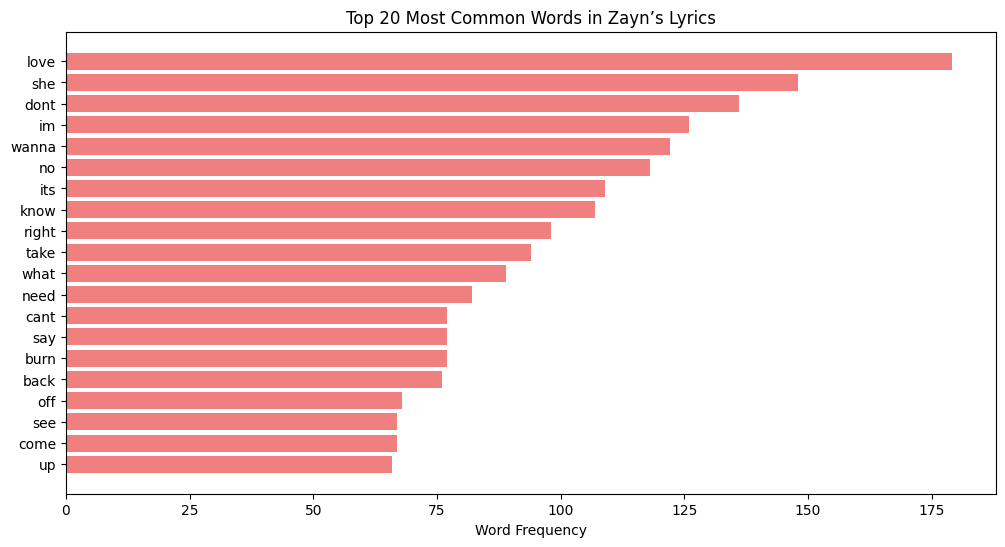

In [8]:
plt.figure(figsize=(12,6))
plt.barh(top_words_df['word'], top_words_df['count'], color='lightcoral')
plt.xlabel('Word Frequency')
plt.title('Top 20 Most Common Words in Zayn’s Lyrics')
plt.gca().invert_yaxis()
plt.show()


In [9]:
df.to_csv("../data/cleaned_lyrics.csv", index=False)


In [10]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# List GPU details
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        print("GPU Found:", gpu)
else:
    print("No GPUs detected.")


Num GPUs Available:  2
GPU Found: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
GPU Found: PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')
